# Introduction 

## **TAKOTSUBO CARDIOMYOPATHY: PREDICTIVE MODEL**

Takotsubo cardiomyopathy (TTC) or « broken heart » syndrome is a condition mostly triggered by physical or emotional stress. It happens when the left ventricule, which is the heart’s largest cavity, responsible for pumping the blood to the whole body through the aorta, swells and changes shape, impairing the heart function by reducing the blood flow coming out of the heart.  

The symptoms are similar to a classic myocardium infarction, but intrinsically different, because in the latter, it’s most of the time because of a stenosis of the coronary arteries (the one feeding the myocardium) provocking ischemia and necrosis of the heart muscle, and impairing its pump function. In TTC, there’s a temporary deformation of the myocardium, leading to the same consequences than an acutal heart infarction.  

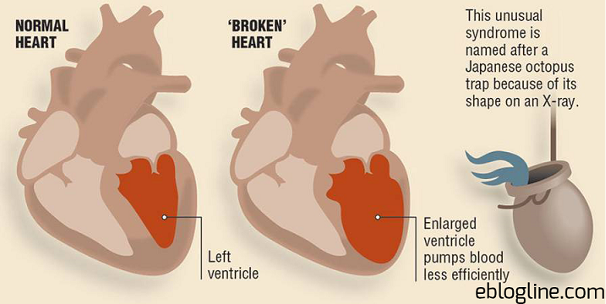



# 1. Initial Analysis(Individual)

## Import libraries, make dataframe

In [ ]:
# !apt-get -qq install r-cran-data.table # Used for pararell operation
%load_ext rpy2.ipython

The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython


In [ ]:
import os
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
sns.set_theme(style="ticks")
sns.set_style("whitegrid")
pd.options.display.max_rows = 999

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
path_dk = "/content/drive/MyDrive/Takotsubo_Prognosis/Tako Final Nes.xlsx"
path = "/content/Tako Final Nes.xlsx"
df = pd.read_excel(path_dk)

Separate 106 122	124 from a main dataframe

In [ ]:
df_nonfill = df[df.index.isin([106, 119, 120, 122,124])]
df=df[~df.index.isin([106, 119, 120, 122,124])]

French to English

In [ ]:
#TODO: Complete French to English  e.x. man⇨gender?, depression anxiety&mental illness&neurological_pathologies⇨These are quite same, find way to name them? 
df.rename(columns={"DDN": "birthdate", "âge": "age","Date hospit initiale": "hospitalisation_date",
                   "Homme": "sex", "poids": "weight", "taille": "height","IMC ( kg/ cm2)": "BMI",
                   "ATCD dépression/axiété": "depression_anxiety_history", "ATCD psychiatrique": "mental_illness_history", 
                   "patho neurologiques": "neurological_pathologies","HTA": "hypertension",
                   "Dyslipidémie": "dyslipidemia", "Tabac": "smoking", 
                   "Diabète": "diabetes","IRC": "chronic_kidney_disease", "AVC/AIT": "stroke_TIA", "ATCD Cancer": "cancer_history", 
                   "Cancer actif": "cancer","BPCO/asthme": "COPD_asthma", "Facteurs de stress": "stress_trigger",
                   "Stress émotionnel": "emotional_stress", "stress physique": "physical_stress", "type stress physique":"physical_stress_type",
                   "ICM Code":"ICM_Code",
                   "BB": "beta_blockers", 
                   "ARA II": "ARA_II","Aspirine": "aspirin",                   
                   "anti P2Y12": "anti_P2Y12","Anticoagulation orale": "oral_anticoagulation", "statines": "statin",
                   "antidépresseur / anxiolytiques": "antidepressant", "Forme apicale": "apical_type", 
                   "médio-ventriculaire": "mid_ventricular","autre": "other", 
                  "FEVG admission": "entry_LVEF","FEVG suivi": "out_LVEF", "atteinte VD": "RV_harm",
                   "ST +": "ST_positive", "QT long": "Long_QT", 
                   "ondes T -": "Tneg_waves","tropo entrée": "entry_troponin",                   
                   "pic tropo": "troponin_peak","NT pro-BNP": "NT_proBNP", "Coronarographie": "coronarography",
                   "Lésions coronariennes sign": "coronary_disease", "Coronaires lisses": "healthy_coronary", 
                   " Insuffisance cardiaque": "heart_failure","Aythmies atriales": "atrium_arrhythmia",
                    "arythmies ventriculaires": "ventricle_arrhythmia","thrombus VG": "thrombus_LV",
                    "choc cardio": "cardiogenic_shock",
                   "décès hospit": "hospital_death", "BB sortie": "beta_blockers", 
                   "IEC sortie": "IEC","ARA II sortie": "ARA_II",
                    "aspirine": "aspirin","Anti P2Y12": "anti_P2Y12",
                    "Anticoag": "oral_anticoagulation",
                   "statines.1": "statin", "antidepresseur": "antidepressant" 
                   ,"COVID +": "Covid_positive", "ATCD Cardio": "Cardio_history", "alcoolisme": "alcoolism"}, inplace=True)

In [ ]:
pd.DataFrame(df.columns).T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68
0,birthdate,age,hospitalisation_date,sex,weight,height,BMI,depression_anxiety_history,mental_illness_history,neurological_pathologies,hypertension,dyslipidemia,smoking,diabetes,chronic_kidney_disease,stroke_TIA,cancer_history,cancer,COPD_asthma,stress_trigger,emotional_stress,physical_stress,physical_stress_type,ICM_Code,ttt entrée = ttt antérieur,beta_blockers,IEC,ARA_II,aspirin,anti_P2Y12,oral_anticoagulation,statin,antidepressant,apical_type,mid_ventricular,basale,other,entry_LVEF,out_LVEF,RV_harm,ST_positive,Long_QT,Tneg_waves,entry_troponin,troponin_peak,NT_proBNP,coronarography,coronary_disease,healthy_coronary,heart_failure,atrium_arrhythmia,ventricle_arrhythmia,thrombus_LV,cardiogenic_shock,ECMO,hospital_death,beta_blockers,IEC,ARA_II,aspirin,anti_P2Y12,oral_anticoagulation,statin,antidepressant,anxiolytiques,CRP,Covid_positive,Cardio_history,alcoolism


Variables description (to complete!)

**Basic patient informations**
'birthdate',
 'age',
 'hospitalisation_date',
 'man': Binary (0: no; 1: yes),
 'weight': in kg,
 'height: in m',
 'BMI': Weight/(Height)**

**Medical History** : Binary (0: absence; 1: existence)
 'depression_anxiety_history',
 'mental_illness_history' : psychiatric disorders,
 'patho neurologiques': ,
 'hypertension',
 'dyslipidemia',
 'smoking',
 'diabetes',
 'chronic_kidney_disease',
 'stroke_TIA',
 'cancer_history',
 'cancer',
 'COPD_asthma',
 'Cardio_history',
 'alcoolisme'

**Triggers**
 'stress_trigger':Binary (0: absence; 1: existence),
 'emotional_stress': Binary (0: absence; 1: existence),
 'physical_stress': Binary (0: absence; 1: existence),
 'type stress physique: Groups: 1)Vascular accident
2)Accident/Fall:
3)Treatment for cancer
4)Inflammatory disease/event:
5)Active cancer/Tumor: 
6)After surgery events:
7)UC
8)Emotional

 **Treatments in-out**: Binary (0: absence; 1: existence)
 'beta_blockers': decrease heartbeat
 'IEC': decrease blood pressure
 'ARA_II': decrease blood pressure
 'aspirin': counter the formation of blood clots
 'anti_P2Y12': counter the formation of blood clots
 'oral_anticoagulation': counter the formation of blood clots
 'statin': decrease the biosynthesis of cholesterol
 'antidepressant'
 'anxiolytiques'
 
 **Anatomy of the Takotsubo**: Binary (0: absence; 1: existence)
 'forme_apicale',
 'medio_ventriculaire',
 'basale',
 'other',

 ** FEVG **: percentage of blood sent into the general circulation through the aorta
 'entry_FEVG',
 'out_FEVG',

**Rhythmic abnormalities**: Binary (0: absence; 1: existence)
 'ST_positive',
 'Long_QT',
 'Tneg_waves',

**Biomarkers**
 'entry_troponine'(ng/L), 
 'troponine_peak'(ng/L),/ Troponine and is a biomarker of cardiomyocytes death
 'NT_proBNP'(ng/L),
 'CRP'(mg/L): Biomarker of inflammatory state of the patient.

**Coronarography exam**: Binary (0: absence; 1: existence)
 'coronarography',
 'coronary_disease',
 'healthy_coronary',

**Inhospital complications** : Binary (0: absence; 1: existence)
 'RV_harm': does the right ventricle present any harm? ,
 'Heart_failure',
 'atrium_arrhythmia',
 'ventricle_arrhythmia',
 'thrombus_LV',
 'cardiogenic_shock': Blood doesn't supply enough oxygen to organs
 'ECMO': extracorporeal membrane oxygenation,
 'hospital_death',


 'Covid_positive',

## Patient Description

Clean data and its type

In [ ]:
df["NT_proBNP"] = df["NT_proBNP"].replace("23 289", "23289")  # Fill the blank 
patient_description = df.loc[:, "birthdate": "BMI"] # Make a dataframe with the patient description
patient_description.BMI = patient_description.BMI.replace("#DIV/0!", np.nan) # replace by 0 Note that inplace=True doesn't work(regex problem)

6 patients with misssing values for BMI 5 of among who don't have neither height, weight and 1 have only weight.

In [ ]:
pd.DataFrame(patient_description.isnull().sum().sort_values(ascending=False), columns=["Missing_Values"]).T

,BMI,height,weight,sex,hospitalisation_date,age,birthdate
Missing_Values,6,6,5,0,0,0,0


Statistics for age, weight, height and BMI

In [ ]:
patient_stats = patient_description.describe().T
patient_stats = patient_stats.loc[patient_stats.index != "gender", :] # Exclude man; categorical variable
patient_stats

,count,mean,std,min,25%,50%,75%,max
age,129.0,71.100775,13.768649,22.000000,62.000000,72.000000,81.000000,96.000000
sex,129.0,0.093023,0.291597,0.000000,0.000000,0.000000,0.000000,1.000000
weight,124.0,64.451613,12.726232,33.000000,57.000000,63.000000,70.000000,128.000000
height,123.0,1.609431,0.073477,1.440000,1.555000,1.600000,1.650000,1.860000
BMI,123.0,24.864123,4.623741,12.855831,22.265625,24.023809,27.281746,48.773053


Patient's age

Text(0.5, 1.0, "Patient's age")

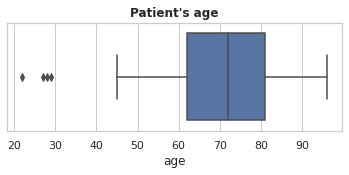

In [ ]:
plt.figure(figsize=(6, 2))
sns.boxplot(x="age",  hue="sex", data=df)
plt.title("Patient's age", fontsize=12, fontweight="bold")

Patient's BMI

Text(0.5, 1.0, "Patient's BMI distribution")

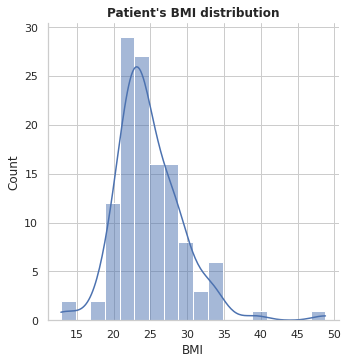

In [ ]:
sns.displot(patient_description, x="BMI", kde=True)
plt.title("Patient's BMI distribution", fontsize=12, fontweight="bold")

Age ｘ BMI

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


Text(0.5, 1.0, "Patient's BMI vs age")

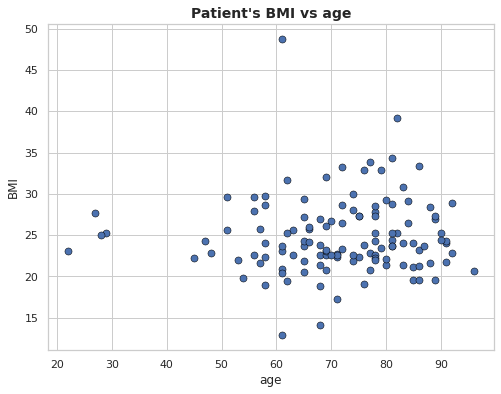

In [ ]:
from pandas.plotting import table
fig, ax = plt.subplots(1, 1)

patient_with_BMI = patient_description[patient_description.BMI.notnull()]
patient_with_BMI.plot.scatter(ax=ax, x = "age", y = "BMI", s=50, edgecolor="black", linewidth=0.5,legend=False, figsize=(8, 6))
plt.title("Patient's BMI vs age", fontsize=14, fontweight="bold")

In [ ]:
#patient_with_BMI.gender = patient_with_BMI.gender.replace({0:"Female", 1:"Male"})
fig = px.violin(patient_with_BMI, y="BMI", x="sex", color="sex", box=True, points="all", title="BMI values based on patient's sex") # fix to M, F, gender
fig.show()

<h3><center>BMI Category</center></h3>

| Value | Category|
|---------|----------|
| ~ 16 |  denutrition |
| 16-18 | underweight |
|18-25 | normal |
|25-30 | overweight |
|30 ~ | obesity |

Split BMI into 5 categories and name them by numerical order from 1 to 5

In [ ]:
bins = [-np.inf, 16, 18, 25, 30, np.inf] # Set lower and upper bound as infinity
BMI_range = pd.cut(patient_description.BMI, bins, labels = "1 2 3 4 5".split(" "))
patient_description["BMI_range"]  = BMI_range

See the patients caetgorized as denutrition

In [ ]:
patient_description[patient_description.BMI_range == "1"]

,birthdate,age,hospitalisation_date,sex,weight,height,BMI,BMI_range
48,1952-07-04,68,2018-01-05 00:00:00,0,33.0,1.53,14.097142,1
65,1959-05-18,61,2019-01-08 00:00:00,0,35.0,1.65,12.855831,1


BMI categories with respect to its age and BMI

In [ ]:
#TODO: Figure out how to plot two scatter in the horizontal 

Text(0.5, 1.0, "Patient's BMI/age in each BMI group")

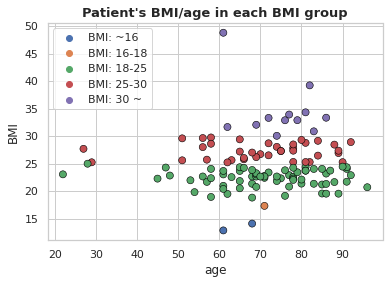

In [ ]:
sns.scatterplot(data=patient_description, x = "age", y = "BMI", hue="BMI_range", s=50, edgecolor="black", markers="BMI_range")
L=plt.legend(loc="best")#, labels=['BMI: ~16', 'BMI: 16-18', 'BMI: 18-25', "BMI: 25-30","BMI: 30 ~"])
L.get_texts()[0].set_text("BMI: ~16")
L.get_texts()[1].set_text("BMI: 16-18")
L.get_texts()[2].set_text("BMI: 18-25")
L.get_texts()[3].set_text("BMI: 25-30")
L.get_texts()[4].set_text("BMI: 30 ~")
plt.title("Patient's BMI/age in each BMI group", fontsize=13, fontweight="bold")

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


Text(0.5, 1.0, "Patient's BMI vs age")

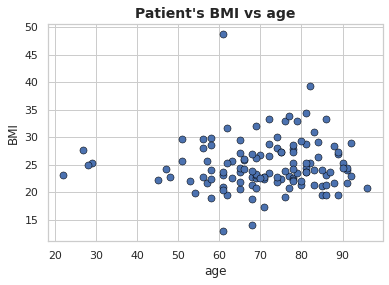

In [ ]:
from pandas.plotting import table
fig, ax = plt.subplots(1, 1)

patient_with_BMI = patient_description[patient_description.BMI.notnull()]
patient_with_BMI.plot.scatter(ax=ax, x = "age", y = "BMI", s=50, edgecolor="black", linewidth=0.5,legend=False)
plt.title("Patient's BMI vs age", fontsize=14, fontweight="bold")

We can observe the most patients are among between 20 to 30

## Return: patient_description

## Medical History

Fill NaN with 0 for cardio history and alcholism

In [ ]:
#TODO: Add information
Cardio_history_alcoolisme = df.iloc[:, -2:].fillna(0) # NaN is 0 for the binary value?

In [ ]:
medical_history = pd.concat([df.loc[:, "depression_anxiety_history":"COPD_asthma" ], Cardio_history_alcoolisme], axis=1)

Missing Values

In [ ]:
pd.DataFrame(medical_history.isnull().sum().sort_values(ascending=False), columns=["Missing_Values"]).T

,alcoolism,Cardio_history,COPD_asthma,cancer,cancer_history,stroke_TIA,chronic_kidney_disease,diabetes,smoking,dyslipidemia,hypertension,neurological_pathologies,mental_illness_history,depression_anxiety_history
Missing_Values,0,0,0,0,0,0,0,0,0,0,0,0,0,0


Check number of each value in each column

Text(0.5, 1.0, 'Total sum of respective medical history')

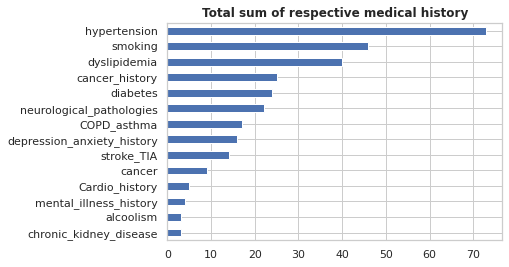

In [ ]:
medical_history.sum().sort_values().plot.barh()
plt.title("Total sum of respective medical history", fontweight="bold")

Hypertension is the most frequent medical history for takotsubo patients

In [ ]:
#TODO: Plot multiple variables in different figure
#SOLVED: fig, ax = plt.subplots()
# positions = (0, 1)
# labels = ("0", "1")

# for column in df.columns:
#   fig, ax = plt.subplots()
#   sns.countplot(x = column, data=df,  hue="sex", )
#   L=plt.legend()
#   L.get_texts()[0].set_text('Woman')
#   L.get_texts()[1].set_text('Man')
#   plt.xticks(positions, labels)

## Return: medical_history

## Stress Factor

In [ ]:
stress_factor = df.loc[:, "stress_trigger": "ICM_Code"]

Missing values

In [ ]:
pd.DataFrame(stress_factor.isnull().sum().sort_values(ascending=False), columns=["Missing_Values"]).T

,ICM_Code,physical_stress_type,physical_stress,emotional_stress,stress_trigger
Missing_Values,98,98,0,0,0


In [ ]:
no_stress = stress_factor[stress_factor["stress_trigger"] == 0]
yes_stress = stress_factor[stress_factor["stress_trigger"] == 1]

In [ ]:
assert len(no_stress["physical_stress_type"].value_counts()) == 0, "Error in table"
assert len(no_stress[no_stress["emotional_stress"] ==1.0]) == 0, "Error in table"
assert len(no_stress[no_stress["physical_stress"] ==1.0]) == 0,  "Error in table"

TODO: Regroup based on biomarkers

ICD10Data: https://www.icd10data.com/ICD10CM/Codes/E00-E89/E40-E46 \
CPT-Codes: https://www.researchgate.net/profile/M-Robyn-Andersen/publication/303559052/figure/tbl4/AS:614281259266088@1523467473542/CPT-Codes-and-Fees-Used-US-and-Insurance-Reimbursement-for-Integrative-Oncology.png \
AAPC: https://www.aapc.com/

Subgroups according to international classification:


- VASCULAR ACCIDENTS:

1. AVC cérébelleux : G464
2. AVC ischémique: G45
3. pré éclampsie: O149
4. choc hémorragique avec CIVD: O460
5. hémorragie méningée sur rupture anévrysme: I671
6. HTA secondaire à une hyperplasie des surrénales: I10
7. choc anaphylactique: T805

- ACCIDENT/FALL


1. Chute: W19
2. Chute + séjour sol prolongé: X31
3. Luxation hanche: S730

- TREATMENT CANCER

1. Cure VIDAZA pour myelodyplasie: Z518
2. chimiothérapie par 5 FU: T451

- INFLAMMATORY DISEASE/EVENT


1.   Méningo-encéphalite et vascularite à VZV: B028
2.   poussé de maladie de Crohn: K509
3.   poussée de myosite auto-immune: M609
4.   sepsis pulmonaire: B371
5.   épisodes infectieux répétés = surinfection pulmonaire: J189
6.   pancréatite stade E: K859
7.   exarcerbation BPCO: J441
8.   peritonite sur perforation d'ulcère:K650

- ACTIVE CANCER/TUMOR


1.   adenocarcinome bronchique en cours: C349
2.   phéochromocytome: D350
3.   état de mal épileptique: G419
4.   Metastase cérébrale: C793
5.   Récidive néomammaire: C509

- AFTER SURGERY

1.   IMG + embolie pulmonaire: O082
2.   Curetage utérin + perf ocytocine: Y848
3.   Fracture L2-L5/Cimentoplasie: S320
4.   Amputation humérus: S5894.   
5.   Opération décollement rétine: H332


- Unclassified
1.   Dénutrition: E46
2.   Coit: X50




















In [ ]:
yes_stress["physical_stress_type"] = yes_stress["physical_stress_type"].replace(np.nan, "emotional")

In [ ]:
yes_stress.loc[:, "emotional_stress":"physical_stress"].sum(axis=0) # Equally distributed

emotional_stress    30.0
physical_stress     31.0
dtype: float64

In [ ]:
#TODO: Find the way to encode: ICM Code
yes_stress 

,stress_trigger,emotional_stress,physical_stress,physical_stress_type,ICM_Code
0,1.0,0.0,1.0,hémorragie méningée sur rupture anévrysme,I671
1,1.0,1.0,0.0,emotional,NaN
2,1.0,0.0,1.0,HTA secondaire à une hyperplasie des surrénales,I10
3,1.0,0.0,1.0,poussée de myosite auto-immune,M609
4,1.0,0.0,1.0,adenocarcinome bronchique en cours,C349
5,1.0,1.0,0.0,emotional,NaN
6,1.0,0.0,1.0,Cure VIDAZA pour myelodyplasie,Z518
7,1.0,0.0,1.0,AVC ischémique,G45
9,1.0,0.0,1.0,péritonite sur perforation d'ulcère,K650
10,1.0,0.0,1.0,Luxation hanche,S730


In [ ]:
# group_list = ["AVC cérébelleux - AVC ischémique - choc hémorragique avec CIVD / pré éclampsie - hémorragie méningée sur rupture anévrysme - HTA secondaire à une hyperplasie des surrénales - choc anaphylactique",
# "Chute + séjour sol prolongé - chute - Luxation hanche",
#  "Cure VIDAZA pour myelodyplasie - chimiothérapie par 5 FU",
# "Méningo-encéphalite et vascularite à VZV - poussé de maladie de Crohn - poussée de myosite auto-immune - sepsis pulmonaire - épisodes infectieux répétés = surinfection pulmonaire - pancréatite stade E - exarcerbation BPCO",
# "adenocarcinome bronchique en cours - phéochromocytome - récidive néo mammaire - état de mal épileptique sur méta cérébrale",
# "complications post op IMG embolie pulmonaire - curetage uterin + perf ocytocine - fracture L2-L5 hospitalisation pour cimentoplastie lombaire - fracture humerus-ostéosynthèse-amputation - opération de décollement de rétine",
# "dénutrition - coit",
# "Emtional"]

In [ ]:
# #TODO: Assign
# #SOLVED: Pandas Concatenations 
# #TODO rows number doesn't match, investigate
# grouped_yes_stress = pd.DataFrame()
# for idx, group in enumerate(group_list):
#   group_names = group.split(" - ")
#   filter = yes_stress["type stress physique"].isin(group_names)
#   filtered = yes_stress[filter]
#   filtered["group"] = idx
#   grouped_yes_stress = pd.concat([grouped_yes_stress, filtered], axis=0)

## Return: stress_factor

## Treatment

In [ ]:
df.columns.get_loc("ttt entrée = ttt antérieur") # Get the integer index of the specified column
treatment_before = df.iloc[: , 25: 33].replace(np.nan, 0) # Exclude ttt entrée = ttt antérieur
treatment_after = df.iloc[:,  56:65].replace(np.nan, 0)

Missing Values

In [ ]:
pd.concat([pd.DataFrame(treatment_before.isnull().sum().sort_values(ascending=False), columns=["Missing_Values_Before"]), pd.DataFrame(treatment_after.isnull().sum().sort_values(ascending=False), columns=["Missing_Values_After"])], axis=1).T

,antidepressant,statin,oral_anticoagulation,anti_P2Y12,aspirin,ARA_II,IEC,beta_blockers,anxiolytiques
Missing_Values_Before,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
Missing_Values_After,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
treatment_before["anxiolytiques"] =0.0 # Add anxiolytiques for treatment_before
sum_treatment = pd.concat([treatment_before.sum(axis=0), treatment_after.sum(axis=0)], axis=1)
sum_treatment.rename(columns = {0:"Total_Sum_Before ", 1:"Total_Sum_After"}, inplace=True)

Text(0.5, 1.0, 'Comparison of total amount of respective treatment before and after the hospitalization')

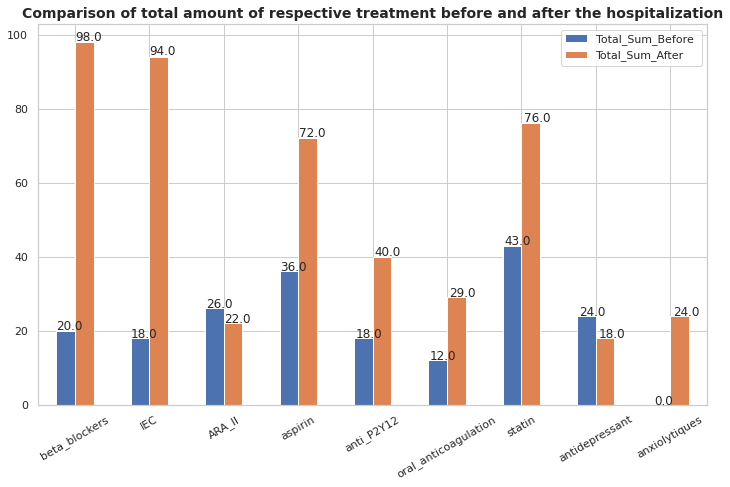

In [ ]:
ax = sum_treatment.plot.bar(figsize=(12, 7), rot=30)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))
plt.title("Comparison of total amount of respective treatment before and after the hospitalization", fontsize=14, fontweight="bold")

In [ ]:
#Exclude anxiolytiques
treatment_before.iloc[:, :8].corr(method="kendall").style.background_gradient(cmap="coolwarm")

,beta_blockers,IEC,ARA_II,aspirin,anti_P2Y12,oral_anticoagulation,statin,antidepressant
beta_blockers,1.000000,0.012937,0.051734,0.258736,0.260180,0.010289,0.151446,-0.039678
IEC,0.012937,1.000000,-0.146554,0.098594,-0.033033,0.102097,0.237289,0.094925
ARA_II,0.051734,-0.146554,1.000000,0.075142,-0.035017,0.105206,0.136641,0.008084
aspirin,0.258736,0.098594,0.075142,1.000000,0.547486,-0.080255,0.183309,-0.075396
anti_P2Y12,0.260180,-0.033033,-0.035017,0.547486,1.000000,-0.051944,0.284747,0.037435
oral_anticoagulation,0.010289,0.102097,0.105206,-0.080255,-0.051944,1.000000,0.113228,0.258376
statin,0.151446,0.237289,0.136641,0.183309,0.284747,0.113228,1.000000,0.042258
antidepressant,-0.039678,0.094925,0.008084,-0.075396,0.037435,0.258376,0.042258,1.000000


In [ ]:
#New correlation can be observed, keep the measure consistent
treatment_after.corr(method="kendall").style.background_gradient(cmap="coolwarm")

,beta_blockers,IEC,ARA_II,aspirin,anti_P2Y12,oral_anticoagulation,statin,antidepressant,anxiolytiques
beta_blockers,1.000000,0.146450,0.062074,0.011045,0.056349,-0.044808,0.046596,-0.035312,0.129025
IEC,0.146450,1.000000,-0.557687,-0.016329,0.024879,-0.130793,-0.013460,-0.005851,-0.066681
ARA_II,0.062074,-0.557687,1.000000,-0.011582,0.190313,0.101425,0.127303,-0.123115,-0.004927
aspirin,0.011045,-0.016329,-0.011582,1.000000,0.414845,-0.231313,0.462637,-0.002095,0.064367
anti_P2Y12,0.056349,0.024879,0.190313,0.414845,1.000000,-0.192974,0.309756,0.024789,-0.056185
oral_anticoagulation,-0.044808,-0.130793,0.101425,-0.231313,-0.192974,1.000000,-0.003218,0.104690,0.219729
statin,0.046596,-0.013460,0.127303,0.462637,0.309756,-0.003218,1.000000,0.108922,0.075330
antidepressant,-0.035312,-0.005851,-0.123115,-0.002095,0.024789,0.104690,0.108922,1.000000,0.439865
anxiolytiques,0.129025,-0.066681,-0.004927,0.064367,-0.056185,0.219729,0.075330,0.439865,1.000000


In [ ]:
# ADD: add_suffix
treatment_total = pd.concat([treatment_before.add_suffix("_in"), treatment_after.add_suffix("_out")], axis=1)

In [ ]:
# TODO: If we have certain treatments, what are types of changes we can observe?

## Return: treatment_total

## Anatomy

Patients echography gives in the acute phase of the disease information about the morphology/anatomy of the left ventricle. In most cases, the apical type is the one observed (in 66% of the cases).

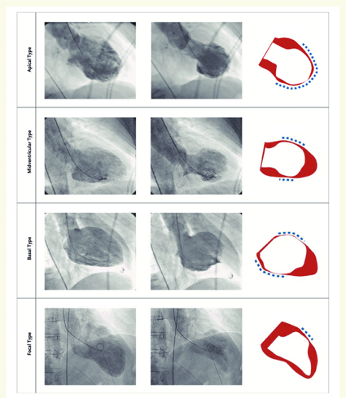


Studies suggest that the apical localisation of the ventricle deformation is due to the inequal repartition of B1 and B2 receptors between the base and the apex of the left ventricle.



In [ ]:
anatomy = df.loc[:, "apical_type":"other"]

Missing Values

In [ ]:
pd.DataFrame(anatomy.isnull().sum().sort_values(ascending=False), columns=["Missing_Values"])

,Missing_Values
other,2
basale,2
mid_ventricular,2
apical_type,2


## Return: anatomy

## LVEF

FEVG - EFLV : Ejection Fraction of the Left ventricle - Percentage of blood sent through the general circulation through the aorta.

• insuffisance cardiaque à fraction d’éjection
préservée : FEVG ≥ 50%
• insuffisance cardiaque à fraction d’éjection
intermédiaire : FEVG : 40-49 %
• insuffisance cardiaque à fraction d’éjection
altérée : FEVG < 40 %

<h3><center>EFLV </center></h3>

| Value | Category|
|---------|----------|
| ~ 30 |   | 
| 40-49 | ? |
|50-55 | normal |
|55 ~ | ? |

Missing Values

In [ ]:
LVEF = df.loc[:, "entry_LVEF":"out_LVEF"]
LVEF = LVEF.astype("float")
LVEF.out_LVEF =LVEF.out_LVEF.replace("NaN", np.nan)

In [ ]:
pd.DataFrame(LVEF.isnull().sum().sort_values(ascending=False), columns=["Missing_Values"])

,Missing_Values
out_LVEF,60
entry_LVEF,0


In [ ]:
bin = [-np.inf, 40, 50, 55, np.inf]
LVEF["entry_LVEF_category"] = pd.cut(LVEF.entry_LVEF, bin, labels = "1 2 3 4".split(" "))

In [ ]:
LVEF.notnull().sum()

entry_LVEF             129
out_LVEF                69
entry_LVEF_category    129
dtype: int64

<AxesSubplot:ylabel='Frequency'>

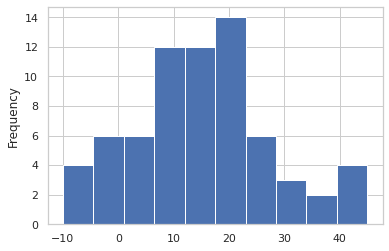

In [ ]:
LVEF.dropna()
diff = LVEF.dropna().out_LVEF - LVEF.dropna().entry_LVEF
diff[diff <0]
diff.plot.hist() 

In [ ]:
#TODO: Find missing values using machine learning algorithm: Nearest neighbors?

## Retrun : LVEF

## Rythmic_abnormality

ECG in Takotsubo patients shows characteristic abnormalties:
- ST positive: the ST segement is supposed to be isoelectric, meaning it has the same level than the base line of the ECG. Represents the lapse between end of ventricle depolarisation and repolarisation.
- T negative waves: T wave represents the repolarisation of the ventricle. 
- Long QT: QT is the time between the beginning of the myocardium depolarisation and the beginning of the repolarisation - time of the heart contraction (systole). If > 0.25 s => long QT.

ST/Long QT:

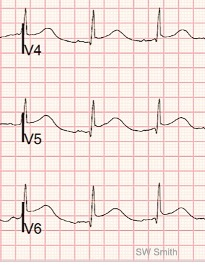

T negative wave:

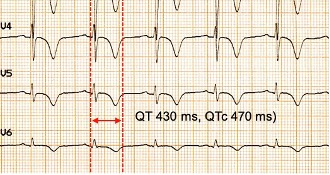


In [ ]:
rythmic_abnormality =df.loc[:, "ST_positive": "Tneg_waves"]

Missing Values

In [ ]:
pd.DataFrame(rythmic_abnormality.isnull().sum().sort_values(ascending=False), columns=["Missing_Values"])

,Missing_Values
Tneg_waves,2
Long_QT,2
ST_positive,2


In [ ]:
print(f"{rythmic_abnormality.sum()*100/134}") # Percentage of positive

ST_positive    18.656716
Long_QT        19.402985
Tneg_waves     50.000000
dtype: float64


## Return: rythmic_abnormality

## Biomarkers

Check if Troponin is used for other case \
TroponinT + NT-proBNP are specific proteins of the cardiomyocytes. If their concentration increases in the blood, it's a marker of cardiomyocytes necrosis.

CRP is an inflammatory marker.

In [ ]:
biomarkers = pd.concat([df.loc[:, "entry_troponin": "NT_proBNP"], df.iloc[:, 65]], axis=1) 

Missing Values

In [ ]:
pd.DataFrame(biomarkers.isnull().sum().sort_values(ascending=False), columns=["Missing_Values"])

,Missing_Values
CRP,108
NT_proBNP,37
troponin_peak,2
entry_troponin,2


In [ ]:
biomarkers.troponin_peak.describe()

count      127.000000
mean       738.450945
std       1775.143522
min          5.000000
25%        146.500000
50%        389.000000
75%        786.500000
max      18829.000000
Name: troponin_peak, dtype: float64

In [ ]:
#TODO: check the way to find the upperbound 

<AxesSubplot:>

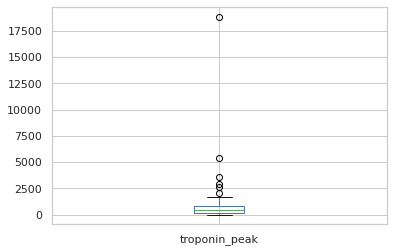

In [ ]:
biomarkers.troponin_peak.plot.box()

Patient description with the highest troponin peak

In [ ]:
df[df.troponin_peak == biomarkers.troponin_peak.max()].T

,84
birthdate,1942-05-23 00:00:00
age,78
hospitalisation_date,2017-07-14 00:00:00
sex,0
weight,70
height,1.6
BMI,27.3438
depression_anxiety_history,0
mental_illness_history,0
neurological_pathologies,0


In [ ]:
biomarkers.troponin_peak.quantile(0.75) - biomarkers.troponin_peak.quantile(0.25) 

640.0

In [ ]:
upper_bound = 786.5 + 1.5*640.0
biomarkers.troponin_peak[biomarkers.troponin_peak >upper_bound]

35      3590.0
72      2646.0
79      2076.0
84     18829.0
97      5380.0
117     2900.0
Name: troponin_peak, dtype: float64

<AxesSubplot:>

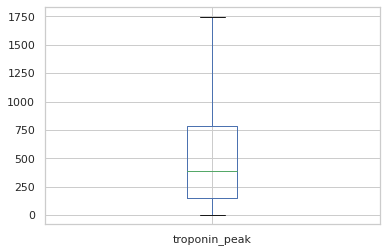

In [ ]:
biomarkers.troponin_peak.clip(biomarkers.troponin_peak.min(), upper_bound).plot.box()

<AxesSubplot:>

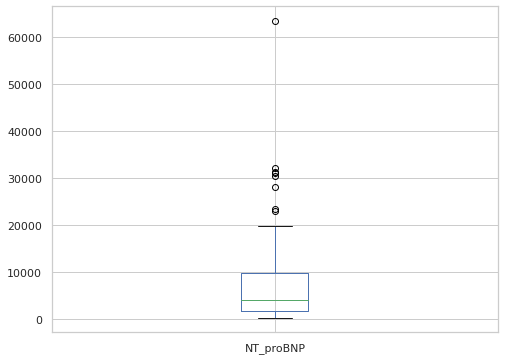

In [ ]:
biomarkers.NT_proBNP.astype("float").plot.box(figsize=(8, 6))

In [ ]:
IQR = biomarkers.NT_proBNP.astype("float").quantile(0.75) - biomarkers.NT_proBNP.astype("float").quantile(0.25) 
Q3 = biomarkers.NT_proBNP.astype("float").quantile(0.75)
Q3+1.5*IQR

21831.625

In [ ]:
# Clipping maximum same as the second largest

In [ ]:
#Keep them in case that we can use to check the correlation in the dataset
# biomarkers["troponine_peak_group"] = pd.cut(biomarkers.troponine_peak.clip(0, 5380.0), 3, labels="1 2 3".split(" "))
# biomarkers["NT_proBNP_group"] = pd.cut(biomarkers.NT_proBNP.astype(float).clip(0, 32105.0), 3, labels="1 2 3".split(" "))

## Return: biomarkers

## Coronarography

Here we check if the Takotsubo could've been triggered by a coronary disease: we check the state of the coronary arteries (if they present atheroma plaques and if they could be a threat to blood circulation in the myocardium)

In [ ]:
coronarography = df.loc[:, "coronarography": "healthy_coronary"]

Missing Values

In [ ]:
#TODO: impute the missing one which we replaced by 0

In [ ]:
pd.DataFrame(coronarography.isnull().sum().sort_values(ascending=False), columns=["Missing_Values"])

,Missing_Values
coronary_disease,12
healthy_coronary,11
coronarography,0


In [ ]:
# Sort out each group
not_examined = coronarography[coronarography.coronarography == 0]
yes_examined = coronarography[coronarography.coronarography == 1]
yes_examined_disease = yes_examined[yes_examined.coronary_disease ==1]
yes_examined_healthy = yes_examined[yes_examined.healthy_coronary ==1]

In [ ]:
# TODO: Check the missing values

In [ ]:
# Add status on each group
not_examined["coronarography_status"] = "not_examined"
yes_examined_disease["coronarography_status"] = "coronary_disease"
yes_examined_healthy["coronarography_status"] = "healthy"

In [ ]:
coronarography_with_status = pd.concat([not_examined, yes_examined_disease, yes_examined_healthy], axis=0).sort_index()

In [ ]:
#TODO: Find the way to stack two variables which are examined
# fig, ax = plt.subplots()
a = pd.DataFrame(coronarography_with_status.coronarography_status.value_counts()).T.not_examined
b = pd.DataFrame(coronarography_with_status.coronarography_status.value_counts()).T[["healthy", "coronary_disease"]]

[Text(0, 0, 'non_examined'), Text(1, 0, 'examined')]

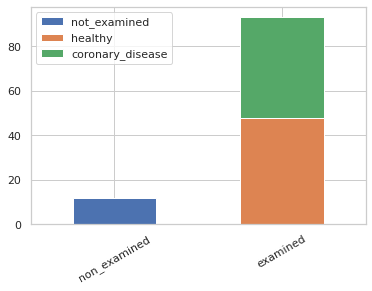

In [ ]:
ax = pd.concat([pd.DataFrame(a), b], axis=0).plot(kind="bar", stacked=True)
ax.set_xticklabels(["non_examined", "examined"], rotation=30)

## Return: coronarography_with_status

## Inhospital consequences

In [ ]:
inhospital_consequences = pd.concat([df.loc[:, "heart_failure": "hospital_death"], df.loc[:, "RV_harm"]], axis=1)

Missing Values

In [ ]:
#TODO: Add discreptions
pd.DataFrame(inhospital_consequences.isnull().sum().sort_values(ascending=False), columns=["Missing_Values"])

,Missing_Values
RV_harm,0
hospital_death,0
ECMO,0
cardiogenic_shock,0
thrombus_LV,0
ventricle_arrhythmia,0
atrium_arrhythmia,0
heart_failure,0


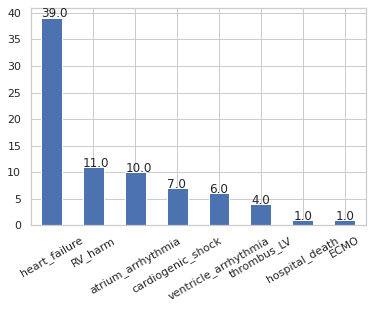

In [ ]:
ax = inhospital_consequences.sum().sort_values(ascending=False).plot.bar(rot=30)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))

**heart failure** is the most frequent inhospital consequences

## Return: inhospital_consequences

## TimeSeries

In [ ]:
time_df = df
time_df.set_index("hospitalisation_date", inplace=True) 
time_df.index = pd.to_datetime(time_df.index)
time_df.resample("Y").sum()

,age,sex,weight,height,depression_anxiety_history,mental_illness_history,neurological_pathologies,hypertension,dyslipidemia,smoking,diabetes,chronic_kidney_disease,stroke_TIA,cancer_history,cancer,COPD_asthma,stress_trigger,emotional_stress,physical_stress,ttt entrée = ttt antérieur,beta_blockers,IEC,ARA_II,aspirin,anti_P2Y12,oral_anticoagulation,statin,antidepressant,apical_type,mid_ventricular,basale,other,entry_LVEF,out_LVEF,RV_harm,ST_positive,Long_QT,Tneg_waves,entry_troponin,troponin_peak,coronarography,coronary_disease,healthy_coronary,heart_failure,atrium_arrhythmia,ventricle_arrhythmia,thrombus_LV,cardiogenic_shock,ECMO,hospital_death,beta_blockers,IEC,ARA_II,aspirin,anti_P2Y12,oral_anticoagulation,statin,antidepressant,anxiolytiques,CRP,Covid_positive,Cardio_history,alcoolism
hospitalisation_date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2015-12-31,323,2,342.0,8.23,1.0,1.0,2.0,2.0,2.0,3.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,2.0,1.0,0.0,0.0,2.0,250,72.0,0.0,0.0,0.0,1.0,1894.70,7776.00,4.0,4.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,4.0,5.0,0.0,4.0,4.0,0.0,4.0,2.0,2.0,0.0,0.0,0.0,0.0
2016-12-31,2287,6,2089.0,48.73,4.0,1.0,5.0,21.0,9.0,11.0,9.0,0.0,3.0,4.0,1.0,3.0,20.0,11.0,9.0,0.0,4.0,3.0,11.0,9.0,2.0,4.0,13.0,7.0,24.0,5.0,1.0,1.0,1479,932.0,2.0,7.0,2.0,17.0,10402.57,16649.47,28.0,8.0,12.0,10.0,1.0,1.0,2.0,1.0,0.0,1.0,26.0,21.0,5.0,19.0,8.0,7.0,18.0,7.0,6.0,0.0,0.0,0.0,0.0
2017-12-31,2280,1,2074.0,51.21,2.0,0.0,6.0,15.0,10.0,10.0,3.0,0.0,5.0,7.0,2.0,6.0,11.0,4.0,7.0,0.0,4.0,4.0,4.0,13.0,6.0,1.0,7.0,4.0,14.0,7.0,2.0,3.0,1485,960.0,2.0,7.0,3.0,18.0,9835.90,33078.00,30.0,11.0,10.0,11.0,3.0,0.0,2.0,2.0,1.0,0.0,24.0,20.0,5.0,19.0,12.0,8.0,20.0,3.0,5.0,0.0,0.0,0.0,0.0
2018-12-31,1594,1,1315.0,35.27,1.0,0.0,3.0,10.0,7.0,8.0,3.0,2.0,1.0,6.0,2.0,4.0,8.0,3.0,5.0,0.0,6.0,1.0,5.0,8.0,4.0,2.0,7.0,4.0,12.0,6.0,0.0,3.0,1007,348.0,2.0,3.0,4.0,10.0,7604.00,15218.60,20.0,8.0,7.0,7.0,2.0,2.0,0.0,1.0,0.0,0.0,16.0,18.0,3.0,13.0,7.0,5.0,11.0,2.0,6.0,0.0,0.0,0.0,0.0
2019-12-31,955,1,851.0,22.05,2.0,1.0,5.0,10.0,5.0,7.0,1.0,0.0,1.0,3.0,1.0,2.0,8.0,6.0,2.0,0.0,1.0,3.0,1.0,3.0,2.0,0.0,3.0,4.0,9.0,4.0,1.0,2.0,577,432.0,2.0,3.0,5.0,10.0,7078.00,9107.00,13.0,6.0,5.0,6.0,2.0,2.0,0.0,1.0,0.0,0.0,9.0,12.0,0.0,9.0,4.0,3.0,9.0,2.0,3.0,86.3,0.0,1.0,0.0
2020-12-31,1733,1,1321.0,32.47,6.0,1.0,1.0,15.0,7.0,7.0,8.0,1.0,3.0,5.0,3.0,2.0,13.0,6.0,7.0,0.0,5.0,6.0,5.0,3.0,3.0,5.0,12.0,3.0,17.0,2.0,0.0,0.0,981,952.0,3.0,5.0,12.0,11.0,9708.00,11954.20,22.0,8.0,14.0,4.0,2.0,1.0,0.0,1.0,0.0,0.0,19.0,18.0,9.0,8.0,5.0,6.0,14.0,2.0,2.0,1168.0,1.0,4.0,3.0


In [ ]:
#TODO: Ask Assan if CRP can be useful

In [ ]:
time_df = time_df.loc[:, ["age", "BMI", "entry_LVEF", "out_LVEF", "entry_troponin", "troponin_peak", "NT_proBNP"]]

In [ ]:
import plotly.offline as ply
import plotly.graph_objs as go
import plotly.figure_factory as ff
from plotly.tools import make_subplots
ply.init_notebook_mode(connected=True)

import colorlover as cl
from IPython.display import HTML

colors=cl.scales['12']['qual']

chosen_colors=[j for i in colors for j in colors[i]]

print('The color palette chosen for this notebook is:')
HTML(cl.to_html(chosen_colors))

The color palette chosen for this notebook is:


In [ ]:
time_df["year"] = time_df.index.year
columns = list(time_df.select_dtypes(np.number).columns)
year = list(time_df.index.year.unique())


for column in columns:
  data=[]
  for g in year:
      data.append(
          go.Violin(
              y=time_df[time_df.year==g][column],
              x=time_df[time_df.year==g].year,
              name=g,
              text=time_df[time_df.year==g].year,
              marker=dict(color=chosen_colors[list(year).index(g)]),
              box=dict(visible=True),
              jitter=1,
              #points=False
              ))

  layout=go.Layout(
      title=f'<b>Yearly values of {column}</b>',
      xaxis=dict(
          title='Year',
          showgrid=False),
      yaxis=dict(title=column),
      showlegend=False,
      hovermode='closest',
      plot_bgcolor='#000000',
      paper_bgcolor='#000000',
      font=dict(
          family='Segoe UI',
          color='#ffffff'))

  figure = go.Figure(data=data, layout=layout)
  figure.show(renderer="colab")

# 2. Data Analysis

In [ ]:
#TODO Check the word embedding word2vec

### Concatenate each dataframe

In [ ]:
coronarography_with_status.shape

(105, 4)

In [ ]:
df_list = [patient_description, medical_history, stress_factor , treatment_total , anatomy , LVEF , rythmic_abnormality, biomarkers, coronarography_with_status , inhospital_consequences]
df_total = pd.concat(df_list, axis=1)

Missing values

In [ ]:
miss = pd.DataFrame(df_total.isnull().sum()).sort_values(by=0, ascending=False)
miss.T

,CRP,ICM_Code,physical_stress_type,out_LVEF,NT_proBNP,coronary_disease,healthy_coronary,coronarography,coronarography_status,BMI_range,BMI,height,weight,troponin_peak,mid_ventricular,basale,apical_type,other,entry_troponin,Tneg_waves,Long_QT,ST_positive,entry_LVEF,oral_anticoagulation_out,anxiolytiques_out,antidepressant_out,statin_out,birthdate,entry_LVEF_category,aspirin_out,heart_failure,atrium_arrhythmia,ventricle_arrhythmia,thrombus_LV,cardiogenic_shock,ECMO,hospital_death,anti_P2Y12_out,anxiolytiques_in,ARA_II_out,IEC_out,hospitalisation_date,sex,depression_anxiety_history,mental_illness_history,neurological_pathologies,hypertension,dyslipidemia,smoking,diabetes,chronic_kidney_disease,stroke_TIA,cancer_history,cancer,COPD_asthma,Cardio_history,alcoolism,stress_trigger,emotional_stress,physical_stress,beta_blockers_in,IEC_in,ARA_II_in,aspirin_in,anti_P2Y12_in,oral_anticoagulation_in,statin_in,antidepressant_in,age,beta_blockers_out,RV_harm
0,108,98,98,60,37,36,35,24,24,6,6,6,5,2,2,2,2,2,2,2,2,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
#TODO: number of missing in each variable(column)

### Imputation

To Nes: It seems we need to export our dataframe as csv and import it inside of R unit. We can trasfer Pandas dataframe directly as long as dataframe doesn't contain objects which is not the case for us as NaN is recognized as objects(we can cast float tho)

Multivariate imputation by chained equations(MICE)

**Step 1**: A simple imputation, such as imputing the mean, is performed for every missing value in the dataset. These mean imputations can be thought of as “place holders.” \
**Step 2**: The “place holder” mean imputations for one variable (“var”) are set back to missing. \
**Step 3**: The observed values from the variable “var” in Step 2 are regressed on the other variables in the imputation model, which may or may not consist of all of the variables in the dataset. In other words, “var” is the dependent variable in a regression model and all the other variables are independent variables in the regression model. These regression models operate under the same assumptions that one would make when performing linear, logistic, or Poison regression models outside of the context of imputing missing data. \
**Step 4**: The missing values for “var” are then replaced with predictions (imputations) from the regression model. When “var” is subsequently used as an independent variable in the regression models for other variables, both the observed and these imputed values will be used. \
**Step 5**: Steps 2–4 are then repeated for each variable that has missing data. The cycling through each of the variables constitutes one iteration or “cycle.” At the end of one cycle all of the missing values have been replaced with predictions from regressions that reflect the relationships observed in the data. \
Step 6: Steps 2–4 are repeated for a number of cycles, with the imputations being updated at each cycle

Article: https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3074241/ \
Animation: https://medium.com/@ofirdi/mice-is-nice-but-why-should-you-care-e66698f245a3 \
R Packages: https://cran.r-project.org/web/packages/mice/mice.pdf

<img src="https://miro.medium.com/max/4800/0*SClvtvYMVhwi28pk.gif" alt="Italian Trulli">

In [ ]:
#df_total.BMI = df.BMI.replace("#DIV/0!", np.nan) 
df_total.to_csv("to_r.csv", index=False)

Python Imputation

TODO: sklearn IterativeImputer/, compare the result
Check again where the error comes from and hopefully figure out the cause of error :( \
Miceforest: https://pypi.org/project/miceforest/ \
Missingpy: https://github.com/epsilon-machine/missingpy \
Iterative Imputer: https://scikit-learn.org/stable/modules/impute.html#iterative-imputer \

In [ ]:
!pip install miceforest

In [ ]:
!pip install missingpy

In [ ]:
import miceforest as mf

# Create kernel. 
kernel = mf.MultipleImputedKernel(
  df_total.select_dtypes(np.number),
  datasets=4,
  save_all_iterations=True,
  random_state=1991
)

# Run the MICE algorithm for 3 iterations on each of the datasets
kernel.mice(3)

KeyboardInterrupt: ignored

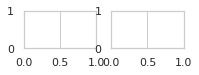

In [ ]:
kernel.plot_imputed_distributions(wspace=1.3,hspace=1.3)
kernel.plot_correlations()
kernel.plot_feature_importance(annot=True,cmap="YlGnBu",vmin=0, vmax=10)
kernel.plot_mean_convergence(wspace=1.2, hspace=1.2)

In [ ]:
from missingpy import MissForest
imputer = MissForest()
imputed = imputer.fit_transform(df_total.select_dtypes(np.number))
pd.DataFrame(imputed)

In [ ]:
import numpy as np
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
imp = IterativeImputer(max_iter=12, random_state=0)
imp.fit(df_total.select_dtypes(np.number))

# the model learns that the second feature is double the first
print(np.round(imp.transform(df_total.select_dtypes(np.number))))

R imputation

In [ ]:
%%R
install.packages("devtools")
devtools::install_github(repo = "amices/mice")

R[write to console]: Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

R[write to console]: trying URL 'https://cran.rstudio.com/src/contrib/devtools_2.4.0.tar.gz'

R[write to console]: Content type 'application/x-gzip'
R[write to console]:  length 369987 bytes (361 KB)

R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[wri

In [ ]:
df_list = [patient_description, medical_history, stress_factor , treatment_total , anatomy , LVEF , rythmic_abnormality, biomarkers, coronarography_with_status , inhospital_consequences]

In [ ]:
%%R 
library(mice, warn.conflicts = FALSE)
library(dplyr)

df <- read.csv("/content/to_r.csv")
patient_discription <- make.blocks(select(df, 'birthdate', 'age', 'hospitalisation_date', 'sex', 'weight', 'height',
       'BMI', 'BMI_range'), partition="collect")
medical_history <- make.blocks(select(df, 'depression_anxiety_history', 'mental_illness_history',
       'neurological_pathologies', 'hypertension', 'dyslipidemia', 'smoking',
       'diabetes', 'chronic_kidney_disease', 'stroke_TIA', 'cancer_history',
       'cancer', 'COPD_asthma', 'Cardio_history', 'alcoolism'), partition="collect")
stress_factor<- make.blocks(select(df, 'stress_trigger', 'emotional_stress', 'physical_stress',
       'physical_stress_type', 'ICM_Code'), partition="collect")
treatment_total<-make.blocks(select(df, 'beta_blockers_in', 'IEC_in', 'ARA_II_in', 'aspirin_in',
       'anti_P2Y12_in', 'oral_anticoagulation_in', 'statin_in',
       'antidepressant_in', 'anxiolytiques_in', 'beta_blockers_out', 'IEC_out',
       'ARA_II_out', 'aspirin_out', 'anti_P2Y12_out',
       'oral_anticoagulation_out', 'statin_out', 'antidepressant_out',
       'anxiolytiques_out'), partition="collect")
anatomy<-make.blocks(select(df, 'apical_type', 'mid_ventricular', 'basale', 'other'), partition="collect")
LVEF<-make.blocks(select(df, 'entry_LVEF', 'out_LVEF', 'entry_LVEF_category'), partition="collect")
rithemic_abnormality<-make.blocks(select(df, 'ST_positive', 'Long_QT', 'Tneg_waves'), partition="collect")
biomarkers<-make.blocks(select(df, 'entry_troponin', 'troponin_peak', 'NT_proBNP', 'CRP'), partition="collect")
coronarography_with_status<-make.blocks(select(df, 'coronarography', 'coronary_disease', 'healthy_coronary',
       'coronarography_status'), partition="collect")
inhospital_consequences<-make.blocks(select(df, 'heart_failure', 'atrium_arrhythmia', 'ventricle_arrhythmia',
       'thrombus_LV', 'cardiogenic_shock', 'ECMO', 'hospital_death',
       'RV_harm'), partition="collect")

R[write to console]: 
Attaching package: ‘dplyr’


R[write to console]: The following objects are masked from ‘package:stats’:

    filter, lag


R[write to console]: The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [ ]:
%%R

imp0 <- mice::mice(data , m=1, maxit=0 )
# update visit sequence
vis1 <- miceadds::visitSequence.determine( impMethod=impMethod, vis=imp0$vis, data=dat)

# imputation with updated visit sequence
imp <- mice::mice( dat, m=1, method=impMethod, visitSequence=vis1, maxit=2)

In [ ]:
%%R
imp <- mice(df, m=2, method="rf", block = c(patient_discription, medical_history, 
                                                  stress_factor, treatment_total, anatomy, 
                                                  LVEF, rithemic_abnormality, biomarkers, coronarography_with_status, inhospital_consequences), )

In [ ]:
%%R -o df_imputed
imp <- mice(df, m=5, method ="rf", threshold=1.05)
df_imputed <-complete(imp)


 iter imp variable
  1   1  weight  height  BMI  BMI_range  apical_type  mid_ventricular  basale  other  out_LVEF  ST_positive  Long_QT  Tneg_waves  entry_troponin  troponin_peak  NT_proBNP  CRP  coronarography  coronary_disease  healthy_coronary
  1   2  weight  height  BMI  BMI_range  apical_type  mid_ventricular  basale  other  out_LVEF  ST_positive  Long_QT  Tneg_waves  entry_troponin  troponin_peak  NT_proBNP  CRP  coronarography  coronary_disease  healthy_coronary
  1   3  weight  height  BMI  BMI_range  apical_type  mid_ventricular  basale  other  out_LVEF  ST_positive  Long_QT  Tneg_waves  entry_troponin  troponin_peak  NT_proBNP  CRP  coronarography  coronary_disease  healthy_coronary
  1   4  weight  height  BMI  BMI_range  apical_type  mid_ventricular  basale  other  out_LVEF  ST_positive  Long_QT  Tneg_waves  entry_troponin  troponin_peak  NT_proBNP  CRP  coronarography  coronary_disease  healthy_coronary
  1   5  weight  height  BMI  BMI_range  apical_type  mid_ventricula

trouble with block

In [ ]:
df_imputed.to_csv("imputed_data.csv")

### Examine correlation of each variable

**Pearson r correlation**: \
Pearson r correlation is the most widely used correlation statistic to measure the degree of the relationship between linearly related variables. For example, in the stock market, if we want to measure how two stocks are related to each other, Pearson r correlation is used to measure the degree of relationship between the two.　

**Kendall rank correlation**: ← This one is *distinguishable*\
Kendall rank correlation is a non-parametric test that measures the strength of dependence between two variables \

**Spearman rank correlation**: \
Spearman rank correlation is a non-parametric test that is used to measure the degree of association between two variables.  The Spearman rank correlation test does not carry any assumptions about the distribution of the data and is the appropriate correlation analysis when the variables are measured on a scale that is at least ordinal.

Comparison of Each Correlation Coefficients

> Pearson correlation vs Spearman and Kendall correlation

**Non-parametric correlations are less powerful** because they use **less information** in their calculations. In the case of Pearson's correlation uses information about the mean and deviation from the mean, while non-parametric correlations use only the ordinal information and scores of pairs.

In the case of non-parametric correlation, it's possible that the X and Y values can be continuous or ordinal, and approximate normal distributions for X and Y are not required. But in the case of Pearson's correlation, it assumes the distributions of X and Y should be normal distribution and also be continuous.

Correlation coefficients only measure linear (Pearson) or monotonic (Spearman and Kendall) relationships.

> Spearman correlation vs Kendall correlation

In the normal case, **Kendall correlation is more robust and efficient than Spearman correlation**. It means that Kendall correlation is preferred when there are small samples or some outliers.

Kendall correlation has a O(n^2) computation complexity comparing with O(n logn) of Spearman correlation, where n is the sample size.

Spearman’s rho usually is larger than Kendall’s tau.

The interpretation of Kendall’s tau in terms of the probabilities of observing the agreeable (concordant) and non-agreeable (discordant) pairs is very direct.

### **Correlation before imputing**

Binary variables:




In [ ]:
non_binary_variables = "birthdate age hospitalisation_date weight height BMI BMI_range physical_stress_type ICM_Code entry_LVEF out_LVEF entry_LVEF_category entry_troponin troponin_peak NT_proBNP coronarography_status".split(" ")

In [ ]:
def correlation_detector(df, threshold=0.4, method="kendall"):
  """
  Arguments
    df: Dataframe
    threshold: Above which individual correlation is kept
    method: method for the correlaiton

  Print
    Correlated variables and its correlation which can be filtered with arbitrary 
    value of threshold

  Returns
    df_corr: Correlation matrix of input dataframe
    keep_columns: non-zero correlation columns
  """

  # Recreate the correlation matrix with information of input matrix
  rows, cols = df.corr().shape
  flds = list(df.corr().columns)
  corr = df.corr(method=method).values
  df_corr = pd.DataFrame(np.zeros((cols, cols)), index=flds, columns=flds)
    
  # Loop over each correlation and check if it's above or below threshold 
  # If over threshold, add that correlation to created correlation matrix(df_corr)
  for i in range(cols):
      for j in range(i+1, cols):
          if corr[i,j] > threshold:
              df_corr.iloc[i, j] = corr[i,j]
              print(flds[i], '/', flds[j], ':', corr[i,j])

  # Keep those columns which contains at least one correlation
  # Note that we only drop non-observed variable from column. 
  # All variables are kept in rows(This makes it possible to filter unnesessary variables)
  keep_columns=[]
  for column in df_corr:
    if df_corr[column].sum(axis=0)!=0:
      keep_columns.append(column)
        
  return df_corr, keep_columns

In [ ]:
def magnify():
  """
  Decoration to augument the functionality of correlation map
  """
  return [dict(selector="th",
              props=[("font-size", "7pt")]),
          dict(selector="td",
              props=[('padding', "0em 0em")]),
          dict(selector="th:hover",
              props=[("font-size", "12pt")]),
          dict(selector="tr:hover td:hover",
              props=[('max-width', '200px'),
                      ('font-size', '20pt')])]

We use **df_total** which is before imputing

In [ ]:
df_corr, keep_columns = correlation_detector(df_total[df_total.columns.difference(non_binary_variables)].drop("anxiolytiques_in",axis=1), threshold=0.5)
df_corr.where(np.triu(np.ones(df_corr.shape), k=1).astype(np.bool))[keep_columns].style.background_gradient(cmap="coolwarm", axis=None).set_table_styles(magnify())

Continuous variable

In [ ]:
df_corr, keep_columns = correlation_detector(df_total[non_binary_variables], threshold=0.0, method="pearson")
df_corr.where(np.triu(np.ones(df_corr.shape), k=1).astype(np.bool))[keep_columns].style.background_gradient(cmap="coolwarm", axis=None).set_table_styles(magnify())

### **Correlation after imputing**

We use **df_imputed** which is after imputing

binary variable:

In [ ]:
df_corr, keep_columns = correlation_detector(df_imputed[df_total.columns.difference(non_binary_variables)].drop("anxiolytiques_in",axis=1), threshold=0.5)
df_corr.where(np.triu(np.ones(df_corr.shape), k=1).astype(np.bool))[keep_columns].style.background_gradient(cmap="coolwarm", axis=None).set_table_styles(magnify())

continuous variable:

In [ ]:
df_corr, keep_columns = correlation_detector(df_imputed[non_binary_variables], threshold=0.0, method="pearson")
df_corr.where(np.triu(np.ones(df_corr.shape), k=1).astype(np.bool))[keep_columns].style.background_gradient(cmap="coolwarm", axis=None).set_table_styles(magnify())

Correlation between binary and continuouse variable

In [ ]:
#TODO: Fix the mixture of categorical and continuous variables
df_imputed.corr(method="kendall").style.background_gradient(cmap="coolwarm")
#Kaggle ANCOVA: https://www.kaggle.com/questions-and-answers/59066
#Point Biseral Correlation: http://www.ce.memphis.edu/7012/L17_CategoricalVariableAssociation.pdf

In [ ]:
import pandas as pd
from scipy.stats import pointbiserialr

# get data
df_imputed



# get continuous and dichotomous data
continuous = df_imputed['']
binary = df_imputed['']

# pbc of first question
pbc = pointbiserialr(question_1, grades)
print(pbc)

Highest correlations: show that the dataset makes sense.
Examples: 


*   Age - Hypertension => it is known the risk of developping hypertension increases with age.
*   Depression/Psychatric disorders are correlated with anti-depressant in/out => makes sense.
*   Neurological pathologies with strokes/TIA => makes sense: degenerative diseases can be triggered after a stroke.
*   Dylipidemia with statin in/out => makes sense too because statins is a part of the treatment for dyslipidemia.


Interesting correlations to check (in-hospital complications):

*   Cancer highly correlated with cardiogenic shock and hospital death.
*   Physical stress with cardiogenic shock








### Dimention Reduction

In [ ]:
# As variable size is huge, worth trying 

In [ ]:
!pip install bhtsne

In [ ]:
# import bhtsne
# tsne_res = bhtsne.tsne(biomarkers.astype(np.float64),dimensions=2)

# plt.scatter(tsne_res[:,0],tsne_res[:,1])

In [ ]:
# Ask Assan 
from sklearn.manifold import TSNE
from mpl_toolkits.mplot3d import Axes3D

inhospital_consequences3d = TSNE(n_components=3).fit_transform(inhospital_consequences)
label=list(np.arange(7))
fig = plt.figure(figsize=(10, 10)).gca(projection='3d')
for i in range(8):
    target = inhospital_consequences3d
    fig.scatter(target[:, 0], target[:, 1], target[:, 2], label=str(i), alpha=0.5)
fig.legend(bbox_to_anchor=(1.02, 0.7), loc='upper left')

### Machine Learning

In [ ]:
#TODO; try Pycaret, check precision_recall curve

In [ ]:
!pip install pip install pycaret
!pip install optuna
!pip install shap

In [ ]:
X = df_imputed[df_imputed.columns.difference(inhospital_consequences.columns)].select_dtypes(np.number)
X = X[X.columns.difference(treatment_after.columns)]
X = X[X.columns.difference(X[["ARA_II_out", "IEC_out", "anti_P2Y12_out", "antidepressant_out", "anxiolytiques_out", "aspirin_out", "beta_blockers_out", "oral_anticoagulation_out", "statin_out"]].columns)]
y = df_imputed[inhospital_consequences.columns].heart_failure
print(X.shape, y.shape)

(129, 49) (129,)


In [ ]:
!pip install -U sklearn

In [ ]:
from pycaret.classification import *
reg_experiment = setup(df_imputed, 
                       target = 'heart_failure', 
                       session_id=123, 
                       log_experiment=True, 
                       experiment_name='ca_housing')

,Description,Value
0,session_id,123
1,Target,heart_failure
2,Target Type,Binary
3,Label Encoded,"0.0: 0, 1.0: 1"
4,Original Data,"(129, 71)"
5,Missing Values,False
6,Numeric Features,17
7,Categorical Features,51
8,Ordinal Features,False
9,High Cardinality Features,False


In [ ]:
best_model = compare_models( fold=5)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
knn,K Neighbors Classifier,0.7778,0.6983,0.37,0.6833,0.4556,0.3342,0.3689,0.144
nb,Naive Bayes,0.7556,0.7325,0.50,0.5867,0.5215,0.3606,0.3729,0.022
rf,Random Forest Classifier,0.7556,0.7129,0.16,0.6000,0.2476,0.1665,0.2266,0.554
ada,Ada Boost Classifier,0.7556,0.7551,0.49,0.5867,0.5096,0.3500,0.3675,0.112
lr,Logistic Regression,0.7444,0.7266,0.41,0.6000,0.4824,0.3149,0.3303,0.258
dt,Decision Tree Classifier,0.7444,0.6380,0.41,0.5333,0.4505,0.2944,0.3038,0.022
gbc,Gradient Boosting Classifier,0.7333,0.7532,0.36,0.4667,0.4056,0.2389,0.2417,0.102
et,Extra Trees Classifier,0.7333,0.7313,0.16,0.5000,0.2381,0.1241,0.1575,0.546
lightgbm,Light Gradient Boosting Machine,0.7000,0.6786,0.36,0.4200,0.3720,0.1857,0.1881,0.034
ridge,Ridge Classifier,0.6778,0.0000,0.45,0.4033,0.4183,0.1972,0.2031,0.020


In [ ]:
top3 = compare_models(n_select = 3)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
knn,K Neighbors Classifier,0.8000,0.7151,0.4333,0.5667,0.4833,0.3754,0.3841,0.117
lr,Logistic Regression,0.7778,0.7405,0.4667,0.5833,0.5067,0.3740,0.3787,0.540
nb,Naive Bayes,0.7667,0.7937,0.4167,0.5167,0.4338,0.3207,0.3362,0.020
rf,Random Forest Classifier,0.7667,0.7540,0.1500,0.4000,0.2167,0.1635,0.1972,0.476
gbc,Gradient Boosting Classifier,0.7556,0.8079,0.4667,0.6333,0.5100,0.3559,0.3793,0.101
lightgbm,Light Gradient Boosting Machine,0.7556,0.6714,0.3667,0.4667,0.3905,0.2652,0.2768,0.085
ridge,Ridge Classifier,0.7444,0.0000,0.6000,0.5417,0.5619,0.3833,0.3879,0.018
et,Extra Trees Classifier,0.7333,0.7262,0.1500,0.3000,0.1900,0.0965,0.1107,0.467
svm,SVM - Linear Kernel,0.7111,0.0000,0.1500,0.1286,0.1111,0.0760,0.0947,0.020
dt,Decision Tree Classifier,0.7000,0.5738,0.3167,0.4333,0.3533,0.1725,0.1823,0.020


In [ ]:
blender = blend_models(top3)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.6667,0.6111,0.3333,0.5000,0.4000,0.1818,0.1890
1,0.7778,0.8889,0.3333,1.0000,0.5000,0.4000,0.5000
2,0.8889,0.8333,0.6667,1.0000,0.8000,0.7273,0.7559
3,0.7778,0.8889,0.6667,0.6667,0.6667,0.5000,0.5000
4,0.7778,0.7857,0.5000,0.5000,0.5000,0.3571,0.3571
5,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
6,0.8889,0.7143,0.5000,1.0000,0.6667,0.6087,0.6614
7,0.8889,1.0000,0.5000,1.0000,0.6667,0.6087,0.6614
8,0.8889,1.0000,0.5000,1.0000,0.6667,0.6087,0.6614
9,0.7778,0.2857,0.0000,0.0000,0.0000,0.0000,0.0000



**Model Calibration** \

When performing classification you often not only want to predict the class label (outcome such as 0 or 1), but also obtain the probability of the respective outcome which provides a level of confidence on the prediction. Some models can give you poor estimates of the class probabilities and some do not even support probability prediction. Well calibrated classifiers are probabilistic and provide outputs in the form of probabilities that can be directly interpreted as a confidence level. PyCaret allows you to calibrate the probabilities of a given model through the calibrate_model() function. See an example below:

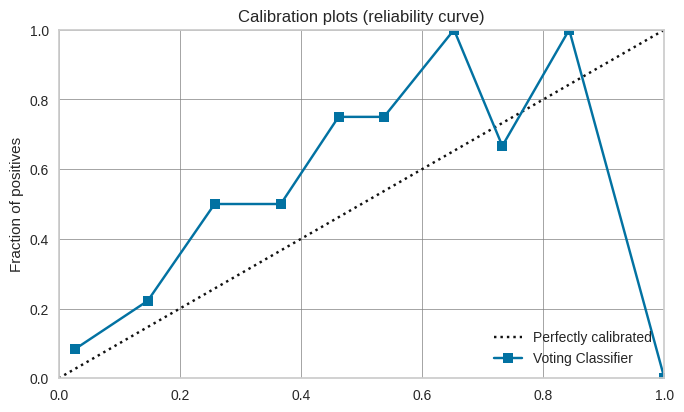

In [ ]:
plot_model(blender, plot = 'calibration')

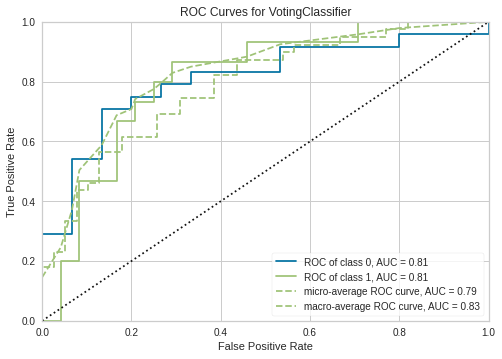

In [ ]:
plot_model(blender, plot = 'auc')

In [ ]:
calibrated  = calibrate_model(blender)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.6667,0.6111,0.3333,0.50,0.4000,0.1818,0.1890
1,0.7778,0.8889,0.3333,1.00,0.5000,0.4000,0.5000
2,0.8889,0.8333,0.6667,1.00,0.8000,0.7273,0.7559
3,0.7778,0.8889,0.3333,1.00,0.5000,0.4000,0.5000
4,0.6667,0.7857,0.0000,0.00,0.0000,-0.1739,-0.1890
5,0.8889,1.0000,0.5000,1.00,0.6667,0.6087,0.6614
6,0.8889,0.8571,0.5000,1.00,0.6667,0.6087,0.6614
7,0.7778,1.0000,0.0000,0.00,0.0000,0.0000,0.0000
8,0.8889,0.8571,0.5000,1.00,0.6667,0.6087,0.6614
9,0.7778,0.2857,0.0000,0.00,0.0000,0.0000,0.0000


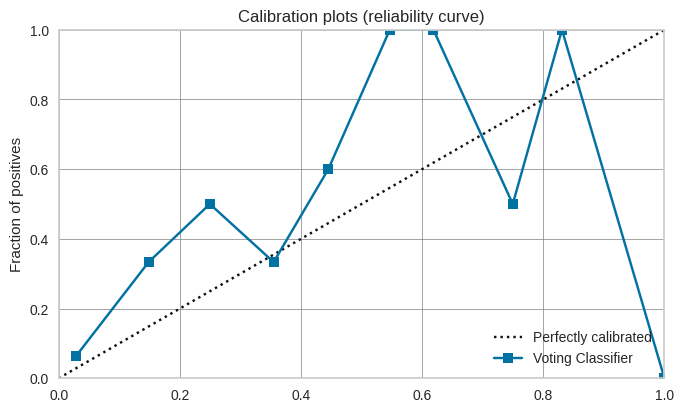

In [ ]:
plot_model(calibrated, plot='calibration')

In [ ]:
lightgbm = create_model('lightgbm')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.6667,0.6667,0.6667,0.5000,0.5714,0.3077,0.3162
1,0.6667,0.6111,0.0000,0.0000,0.0000,0.0000,0.0000
2,0.7778,0.8333,0.6667,0.6667,0.6667,0.5000,0.5000
3,0.7778,0.8889,0.3333,1.0000,0.5000,0.4000,0.5000
4,0.6667,0.2857,0.0000,0.0000,0.0000,-0.1739,-0.1890
5,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
6,0.7778,0.8571,0.5000,0.5000,0.5000,0.3571,0.3571
7,0.8889,0.6429,0.5000,1.0000,0.6667,0.6087,0.6614
8,0.6667,0.6429,0.0000,0.0000,0.0000,-0.1739,-0.1890
9,0.6667,0.2857,0.0000,0.0000,0.0000,-0.1739,-0.1890


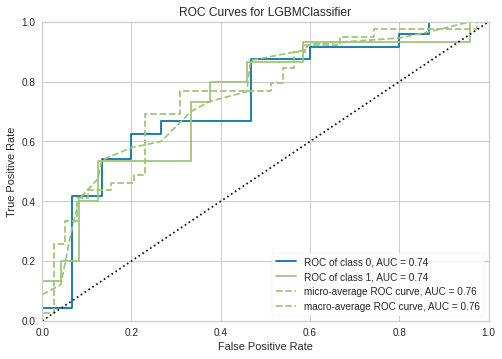

In [ ]:
plot_model(lightgbm, plot = 'auc')

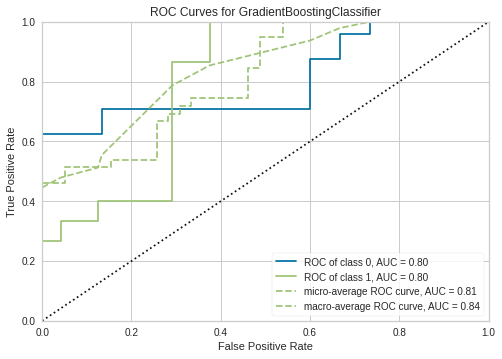

In [ ]:
automl_model = automl(optimize = 'AUC')
plot_model(automl_model, plot = 'auc')

In [ ]:
import lightgbm as lgb
import numpy as np
import sklearn.datasets
import sklearn.metrics
from sklearn.model_selection import train_test_split

import optuna

# def objective(trial):
#     train_x, valid_x, train_y, valid_y = train_test_split(X, y, test_size=0.25, random_state=42)
#     dtrain = lgb.Dataset(train_x, label=train_y)

#     param = {
#         "objective": "binary",
#         "metric": "binary_logloss",
#         "verbosity": -1,
#         "boosting_type": "gbdt",
#         "lambda_l1": trial.suggest_float("lambda_l1", 1e-8, 10.0, log=True),
#         "lambda_l2": trial.suggest_float("lambda_l2", 1e-8, 10.0, log=True),
#         "num_leaves": trial.suggest_int("num_leaves", 2, 256),
#         "feature_fraction": trial.suggest_float("feature_fraction", 0.4, 1.0),
#         "bagging_fraction": trial.suggest_float("bagging_fraction", 0.4, 1.0),
#         "bagging_freq": trial.suggest_int("bagging_freq", 1, 7),
#         "min_child_samples": trial.suggest_int("min_child_samples", 5, 100),
#     }

#     gbm = lgb.train(param, dtrain)
#     preds = gbm.predict(valid_x)
#     pred_labels = np.rint(preds)
#     accuracy = sklearn.metrics.accuracy_score(valid_y, pred_labels)
#     return accuracy


# if __name__ == "__main__":
#     study = optuna.create_study(direction="maximize")
#     study.optimize(objective, n_trials=1000)

#     print("Number of finished trials: {}".format(len(study.trials)))

#     print("Best trial:")
#     trial = study.best_trial

#     print("  Value: {}".format(trial.value))

#     print("  Params: ")
#     for key, value in trial.params.items():
#         print("    {}: {}".format(key, value))

In [ ]:
train_x, valid_x, train_y, valid_y = train_test_split(X, y, test_size=0.25)

In [ ]:
dtrain = lgb.Dataset(train_x, label=train_y)

param = {
    
      "objective": "binary",
    "metric": "binary_logloss",
    "verbosity": -1,
    "boosting_type": "gbdt",
    "lambda_l1": 0.02793865122821334,
    "lambda_l2": 6.826747702500326e-07,
    "num_leaves": 153,
    "feature_fraction": 0.5928088789054791,
    "bagging_fraction": 0.47214401792490684,
    "bagging_freq": 5,
    "min_child_samples": 71,
}

gbm = lgb.train(param, dtrain)
preds = gbm.predict(valid_x)
pred_labels = np.rint(preds)
accuracy = sklearn.metrics.accuracy_score(valid_y, pred_labels)

In [ ]:
print(f"Accuracy of LightGBM(Tree based): {accuracy}") 

In [ ]:
import shap
explainer = shap.TreeExplainer(gbm)
shap_values = explainer.shap_values(X)

In [ ]:
shap.initjs()
shap.force_plot(explainer.expected_value[1], shap_values[1][1,:], X.iloc[1,:])

In [ ]:
shap.initjs()
shap.force_plot(explainer.expected_value[1], shap_values[1][:1000,:], X.iloc[:1000,:])

In [ ]:
shap.summary_plot(shap_values, X)

In [ ]:
for name in X_train.columns:
    shap.dependence_plot(name, shap_values[1], X, display_features=X_display)

In [ ]:
train_x, valid_x, train_y, valid_y = train_test_split(X, y, test_size=0.2)

In [ ]:
from sklearn.linear_model import LogisticRegression
regressor = LogisticRegression()
regressor.fit(train_x, train_y)

In [ ]:
y_pred = regressor.predict(valid_x)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(valid_y, y_pred)

In [ ]:
y_pred

In [ ]:
valid_y.values

In [ ]:
print(y_pred)
print(valid_y.values)

In [ ]:
regressor.coef_

In [ ]:
dir(regressor)

Model Evaluation

Number of finished trials: 1000 \
Best trial: \
  Value: 0.7878787878787878 \
  Params:  \
    lambda_l1: 1.688456590304588e-05 \
    lambda_l2: 0.00019292123442567937 \
    num_leaves: 128 \
    feature_fraction: 0.6805343524981782 \
    bagging_fraction: 0.6957434860718225 \
    bagging_freq: 3  \
    min_child_samples: 26 \

In [ ]:
dir(trial)